In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [14]:
Dataset1_Gaussian = pd.read_csv("cleaned_departures_development_traffic1.csv")
Dataset1_Gaussian = Dataset1_Gaussian.drop(columns=["Name", "Development_Level", "Traffic"])
Dataset1_Gaussian = Dataset1_Gaussian[~Dataset1_Gaussian["Area"].isin(["High", "Low", "Medium"])]

print(Dataset1_Gaussian)

     Departures  Domestic  International  FlagCarrier_Flights      Area
0          7422         0           7422                 1925  Americas
1         11822      8395           3427                11496      Asia
2          4978      2907           2071                 5891    Africa
3          3742         8           3734                 2249  Americas
4          6535         0           6535                 4085    Europe
..          ...       ...            ...                  ...       ...
217         807         0            807                 1132   Pacific
218         463         8            455                  560      Asia
219       96704     76147          20557               102696    Africa
220       10390      6394           3996                 6648    Africa
221        7577      2896           4681                 3866    Africa

[217 rows x 5 columns]


In [15]:
Training_G, Testing_G = train_test_split(Dataset1_Gaussian, test_size=.3)
print("Training G:", Training_G)
print("Testing G:", Testing_G)
##  Save the Labels and then remove them from the Training and Testing data
Training_G_Label = Training_G["Area"]
Training_G=Training_G.drop(["Area"], axis=1)
Testing_G_Label = Testing_G["Area"]
Testing_G=Testing_G.drop(["Area"], axis=1)
print("Testing G:", Testing_G)
print("Testing G labels:", Testing_G_Label)

Training G:      Departures  Domestic  International  FlagCarrier_Flights      Area
17         3204       556           2648                 3519    Africa
89         6077      1556           4521                 3227  Americas
52         1697         0           1697                  941    Africa
216        1479      1384             95                    0   Pacific
38         6050       390           5660                 2582    Africa
..          ...       ...            ...                  ...       ...
1         11822      8395           3427                11496      Asia
211       20175     14897           5278                37747  Americas
135        2376       539           1837                 3808    Africa
50        20593       101          20492                10188    Europe
107        3422        68           3354                    0  Americas

[151 rows x 5 columns]
Testing G:      Departures  Domestic  International  FlagCarrier_Flights      Area
34          110  

GaussianNB()
['Africa' 'Africa' 'Americas' 'Africa' 'Africa' 'Africa' 'Africa' 'Africa'
 'Europe' 'Europe' 'Africa' 'Africa' 'Europe' 'Africa' 'Africa' 'Africa'
 'Africa' 'Africa' 'Africa' 'Africa' 'Europe' 'Africa' 'Africa' 'Africa'
 'Asia' 'Africa' 'Africa' 'Africa' 'Pacific' 'Africa' 'Africa' 'Europe'
 'Africa' 'Africa' 'Europe' 'Africa' 'Africa' 'Africa' 'Africa' 'Pacific'
 'Africa' 'Africa' 'Africa' 'Africa' 'Europe' 'Africa' 'Europe' 'Africa'
 'Asia' 'Europe' 'Africa' 'Africa' 'Africa' 'Africa' 'Americas' 'Europe'
 'Africa' 'Africa' 'Americas' 'Europe' 'Africa' 'Europe' 'Europe' 'Africa'
 'Americas' 'Africa']
The Gaussian NB Model Prediction Probabilities are:
[[0.976 0.    0.    0.008 0.016]
 [0.977 0.    0.    0.007 0.016]
 [0.    0.997 0.003 0.    0.   ]
 [0.823 0.    0.003 0.168 0.007]
 [0.977 0.    0.    0.007 0.015]
 [0.972 0.    0.    0.02  0.007]
 [0.977 0.    0.    0.007 0.016]
 [0.978 0.    0.    0.007 0.015]
 [0.007 0.    0.014 0.98  0.   ]
 [0.    0.    0.016 0.984 0.

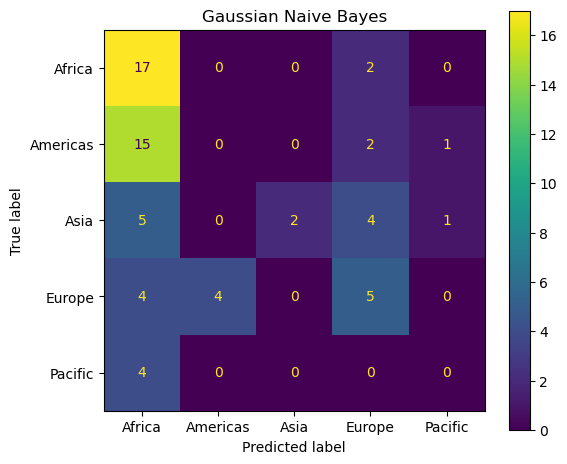

In [16]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## For Gaussian Naive Bayes ------------------------

# Instantiate
MyGNB = GaussianNB()

# Train the model
My_GNB_Model = MyGNB.fit(Training_G, Training_G_Label)
print(My_GNB_Model)

# Predict
Predictions_G = My_GNB_Model.predict(Testing_G)
print(Predictions_G)

# Print probabilities
print("The Gaussian NB Model Prediction Probabilities are:")
print(My_GNB_Model.predict_proba(Testing_G).round(3))

# Confusion Matrix
CM_G = confusion_matrix(Testing_G_Label, Predictions_G)
print(CM_G)

# Print class labels
print(My_GNB_Model.classes_)

# Create subplot (1 row, 1 column)
fig, ax = plt.subplots(1, 1, figsize=(6, 5))  # just one plot

# Pretty confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=CM_G, display_labels=My_GNB_Model.classes_)
disp.plot(ax=ax)
ax.set_title("Gaussian Naive Bayes")

plt.tight_layout()
plt.show()

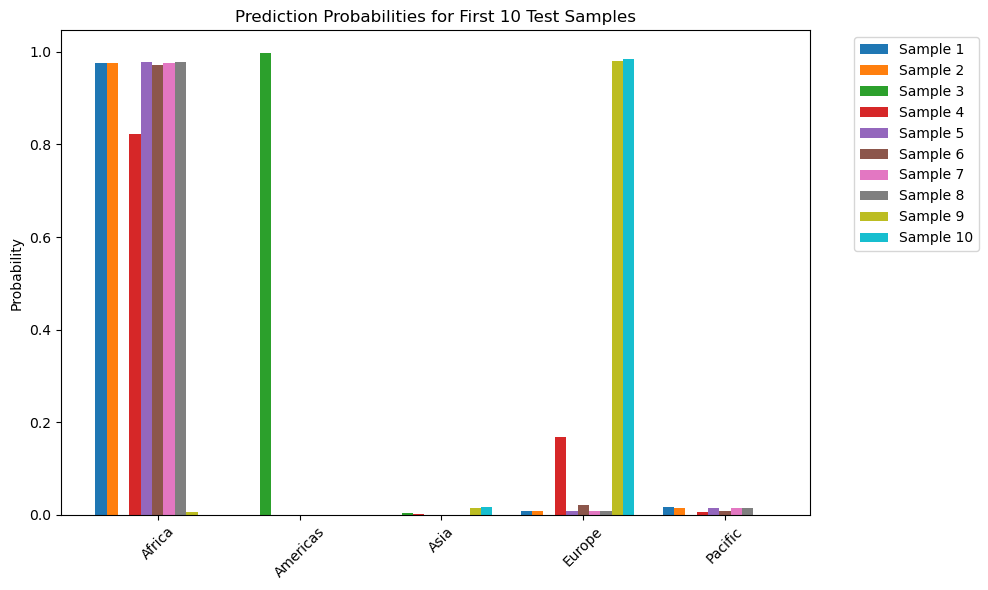

In [18]:
import numpy as np

# Get probabilities
probs = My_GNB_Model.predict_proba(Testing_G)

# Plot prediction probabilities for first 10 test samples
num_samples = 10
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart
x = np.arange(len(My_GNB_Model.classes_))
width = 0.08

for i in range(num_samples):
    ax.bar(x + i * width, probs[i], width, label=f'Sample {i+1}')

ax.set_xticks(x + width * (num_samples // 2))
ax.set_xticklabels(My_GNB_Model.classes_, rotation=45)
ax.set_ylabel("Probability")
ax.set_title("Prediction Probabilities for First 10 Test Samples")
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
